<a href="https://colab.research.google.com/github/Otmane-debug/MachineLearning-LogisticRegression/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [428]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Load the data
train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")

#train_data.info()
#train_data.describe()

train_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [429]:

train = train_data.drop(['PassengerId', 'Cabin', 'Name'], axis=1)
test = test_data.drop(['PassengerId', 'Cabin', 'Name'], axis=1)


In [430]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 687.8+ KB


In [431]:
print("Train data Null sum :")
train.select_dtypes(exclude=['object']).isnull().sum()




Train data Null sum :


Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [432]:
print("Test data Null num")
test.select_dtypes(exclude=['object']).isnull().sum()

Test data Null num


Age              91
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [433]:
nd= train.select_dtypes(exclude=['object']).drop('Transported', axis=1)

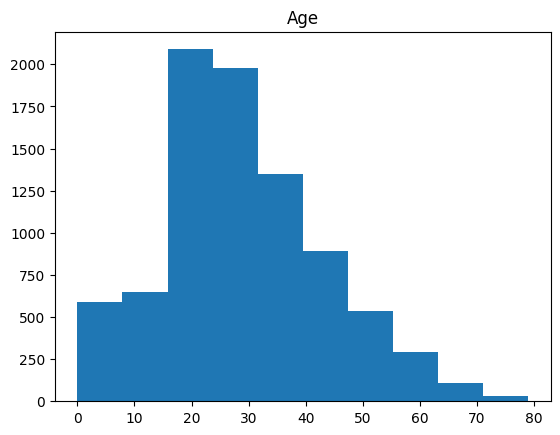

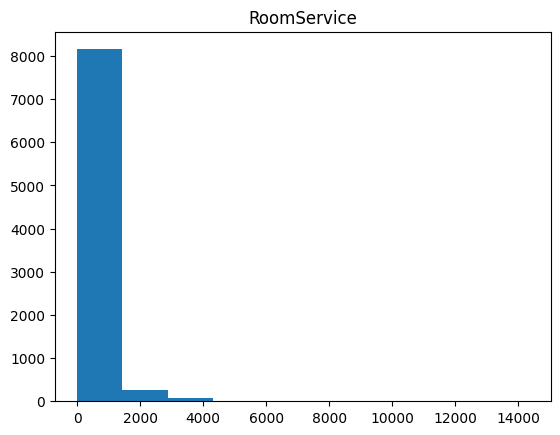

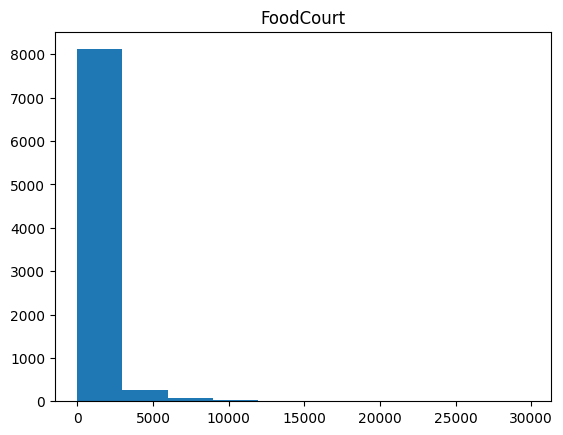

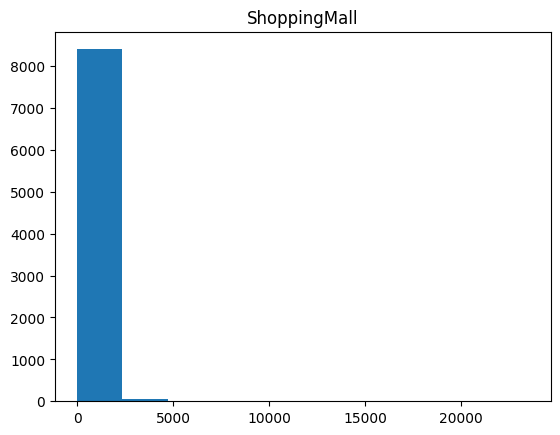

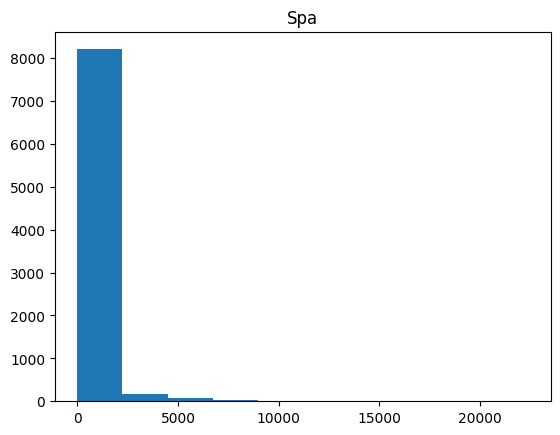

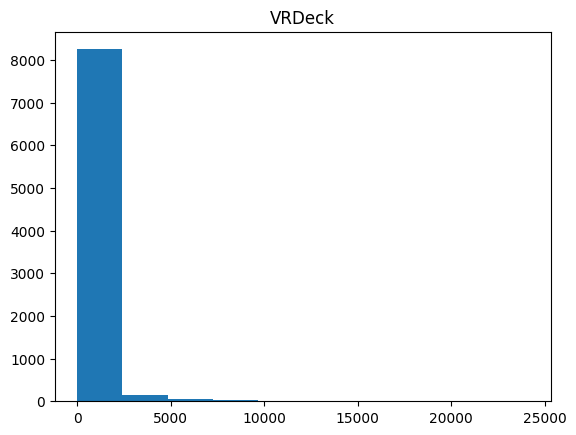

In [434]:
for i in nd.columns:
  plt.hist(train[i])
  plt.title(i)
  plt.show()

In [435]:
train_columns = train.columns.to_list()
test_columns = test.columns.to_list()



print(train_columns)
print(test_columns)

['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']
['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [436]:
print(train.columns.to_list())

['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']


In [437]:
from pandas.core.arrays.numeric import T
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder


cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']
Cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']


cat_train = train[cols]
cat_test = test[Cols]

train = train.drop(cols, axis=1)
test = test.drop(Cols, axis=1)

train_columns = train.columns.to_list()

test_columns = test.columns.to_list()

train_columns = train_columns + cols
test_columns = test_columns + Cols

ordinal_encoder = OrdinalEncoder()
cat_train = ordinal_encoder.fit_transform(cat_train)
cat_test = ordinal_encoder.fit_transform(cat_test)

# Convert the NumPy arrays to DataFrames
cat_train_df = pd.DataFrame(cat_train)
cat_test_df = pd.DataFrame(cat_test)

# Concatenate the DataFrames
train = pd.concat([train, cat_train_df], axis=1)
test = pd.concat([test, cat_test_df], axis=1)

In [438]:
train.columns = train_columns
test.columns = test_columns


In [439]:
# Imputation
my_imputer = SimpleImputer()
train = pd.DataFrame(my_imputer.fit_transform(train))
test = pd.DataFrame(my_imputer.fit_transform(test))

In [440]:
train.columns = train_columns
test.columns = test_columns

In [441]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           8693 non-null   float64
 1   RoomService   8693 non-null   float64
 2   FoodCourt     8693 non-null   float64
 3   ShoppingMall  8693 non-null   float64
 4   Spa           8693 non-null   float64
 5   VRDeck        8693 non-null   float64
 6   HomePlanet    8693 non-null   float64
 7   CryoSleep     8693 non-null   float64
 8   Destination   8693 non-null   float64
 9   VIP           8693 non-null   float64
 10  Transported   8693 non-null   float64
dtypes: float64(11)
memory usage: 747.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           4277 non-null   float64
 1   RoomService   4277 non-null   float64
 2   Fo

In [442]:
print("Train data Null sum :")
print(train.isnull().sum())
print("")

Train data Null sum :
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
HomePlanet      0
CryoSleep       0
Destination     0
VIP             0
Transported     0
dtype: int64



In [443]:
print("Test data Null num")
print(test.isnull().sum())

Test data Null num
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
HomePlanet      0
CryoSleep       0
Destination     0
VIP             0
dtype: int64


In [444]:
X = train.drop('Transported', axis=1)
y = train['Transported']


In [445]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [446]:
models = [
    GaussianNB(),
    LogisticRegression(max_iter=2000),
    tree.DecisionTreeClassifier(random_state = 1),
    KNeighborsClassifier(),
    RandomForestClassifier(random_state = 1),
    SVC(probability = True),
    XGBClassifier(random_state =1)
]

In [447]:


best_score = 0
model_used = 0

predictions_val = 0
cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']

for model in models:

  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

  # Créer un pipeline
  pipe = make_pipeline(
      model
  )
  pipe.fit(X_train, y_train)  # apply scaling on training data

  pipe.score(X_val, y_val)  # apply scaling on testing data, without leaking training data.

  # Make predictions on the validation set
  predictions_val = pipe.predict(X_val)

  # Calculate accuracy on the validation set
  accuracy = accuracy_score(y_val, predictions_val)
  #print("Accuracy on validation data:", accuracy)

  print(accuracy)

  if accuracy > best_score:
    best_score = accuracy
    model_used = model.__class__.__name__

print("model used : " + str(model_used))
print("best validation score = " +str(best_score))

0.7090281771132835
0.7929844738355377
0.7297297297297297
0.7826336975273146
0.7860839562967222
0.7993099482461185
0.7918343875790684
model used : SVC
best validation score = 0.7993099482461185


In [448]:
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

  # Créer un pipeline
  pipe = make_pipeline(
      SVC(probability = True)
  )
  pipe.fit(X_train, y_train)  # apply scaling on training data

  pipe.score(X_val, y_val)  # apply scaling on testing data, without leaking training data.

  # Make predictions on the validation set
  predictions_val = pipe.predict(X_val)

  # Calculate accuracy on the validation set
  accuracy = accuracy_score(y_val, predictions_val)
  #print("Accuracy on validation data:", accuracy)

In [449]:
class_report = classification_report(y_val, predictions_val)
print("Classification Report on validation data:\n", class_report)

Classification Report on validation data:
               precision    recall  f1-score   support

         0.0       0.84      0.72      0.78       843
         1.0       0.77      0.88      0.82       896

    accuracy                           0.80      1739
   macro avg       0.81      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [450]:
# Predict on the test data
predictions_test = pipe.predict(test)

In [451]:
predictions_test = [True if pred == 1 else False for pred in predictions_test]

passenger_predictions = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Transported': predictions_test})


In [452]:
# Save passenger_predictions to a CSV file
passenger_predictions.to_csv('./submission.csv', index=False)